In [39]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import cv2 as cv
import skimage.feature as sk

In [40]:
def plot_image(image,color,title):
  plt.grid("false")
  plt.title(title)
  if(color=='colored'):
    plt.imshow(image)
  elif(color=="gray"):
    plt.imshow(image,cmap='gray',interpolation="bicubic")

In [41]:
def BGR2RGB(image):
  return cv.cvtColor(image,cv.COLOR_BGR2RGB)     

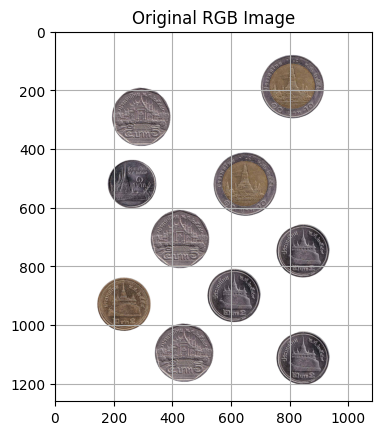

In [42]:
image = cv.imread('44 baht.png')
RGB_image=BGR2RGB(image)
plot_image(RGB_image,"colored","Original RGB Image")

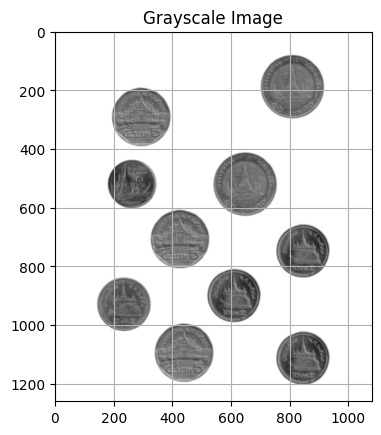

In [43]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plot_image(gray_image,"gray","Grayscale Image")

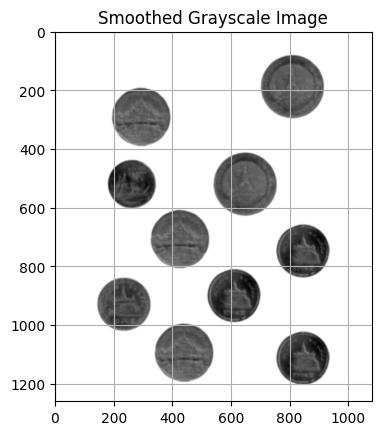

In [44]:
median_image=cv.medianBlur(gray_image,7)
plot_image(median_image,"gray","Smoothed Grayscale Image")

Edge Detection Using Canny's Algorithm

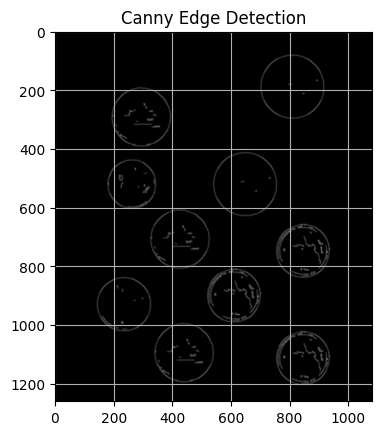

In [45]:
edges = cv.Canny(median_image, threshold1=100, threshold2=200)
plot_image(edges, "gray", "Canny Edge Detection")

Hough Transform

In [46]:
def circle(x,y,b,r):
  a=x-np.sqrt(r**2-(y-b)**2)
  return int(round(a))     

In [47]:
def CHT(edges,r):
    H = np.zeros(edges.shape)
    b_range = edges.shape[1]
    for x, y in np.argwhere(edges == 255):
        for b in range(b_range):
            if (y-b)**2 <= r**2:
                a = circle(x, y, b, r)
                if 0 <= a < edges.shape[0]:
                    H[a, b] += 1
    plot_image(H, "gray", "Hough space")
    return H

In [48]:
monetary_value=0

In [49]:
def calc_monetary(monetary_value,no_of_centres,type_of_coin):
  if(type_of_coin=="10"):
    monetary_value+=no_of_centres*10
  elif(type_of_coin=="5"):
    monetary_value+=no_of_centres*5
  elif(type_of_coin=="2"):
    monetary_value+=no_of_centres*2
  else:
    monetary_value+=no_of_centres*1
  return monetary_value

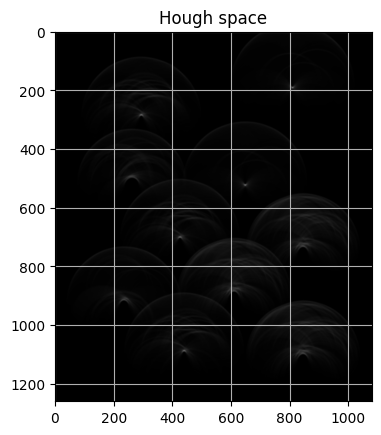

In [60]:
H_10=CHT(edges,105)

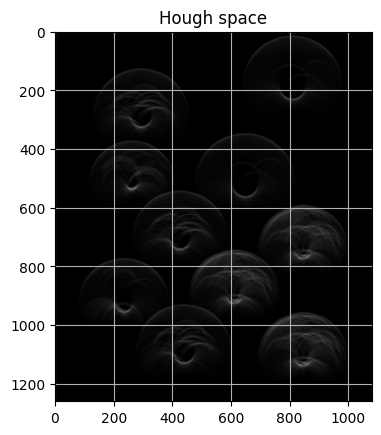

In [13]:
H_5=CHT(edges,65)

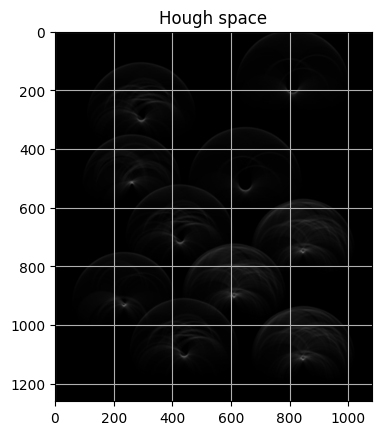

In [56]:
H_2=CHT(edges,86)

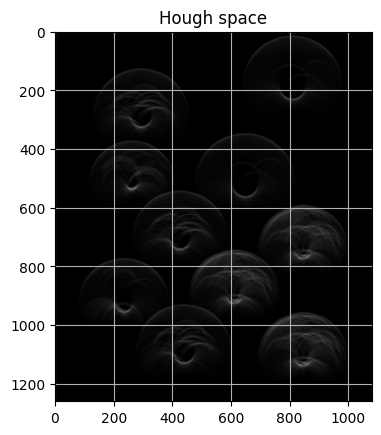

In [64]:
H_1=CHT(edges,65)

In [50]:
def find_peaks(H):
  peaks=sk.peak_local_max(H,threshold_abs=58)
  return peaks 

In [51]:
def plot_circle(peaks,radius,r,b,g,title,copy):
  for i in np.ndindex(peaks.shape[0]):
    cx=peaks[i][0]
    cy=peaks[i][1]
    if(cx!=0 and cy!=0):
      cv.circle(copy,(cy,cx),radius,(r,b,g),7)
  plot_image(copy,"colored",title)

In [52]:
def NMS(peaks,r):
  for i in np.ndindex(peaks.shape[0]):
    for j in range(i[0]+1,peaks.shape[0]):
      cx1=peaks[i][0]
      cy1=peaks[i][1]
      cx2=peaks[j,0]
      cy2=peaks[j,1]
      if(cx1+cy1!=0 and cx2+cy2!=0):
        distance=np.sqrt((cy2-cy1)**2+(cx2-cx1)**2)
        if(distance<2*r):
          peaks[j,0]=0
          peaks[j,1]=0

In [53]:
output=RGB_image

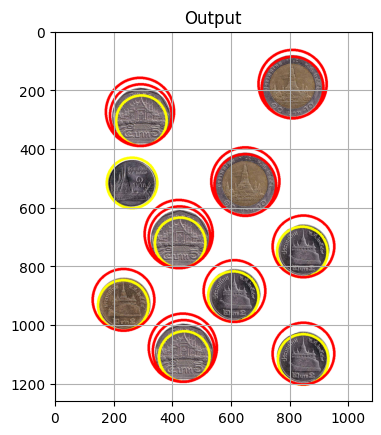

In [61]:
peaks_baht=find_peaks(H_10)
NMS(peaks_baht,105)
plot_circle(peaks_baht,105,255,0,0,"Output",output)
count_10_bahts=peaks_baht.shape[0]-np.sum(~peaks_baht.any(1))
monetary_value=calc_monetary(monetary_value,count_10_bahts,"10")

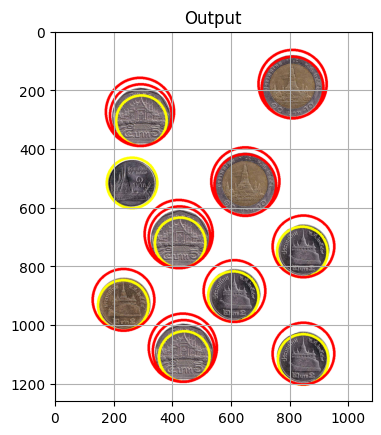

In [62]:
peaks_5 = find_peaks(H_5)
NMS(peaks_5, 45)
plot_circle(peaks_5, 45, 0, 255, 0, "Output", output)
count_5_bahts = peaks_5.shape[0] - np.sum(~peaks_5.any(1))
monetary_value = calc_monetary(monetary_value, count_5_bahts, "5")

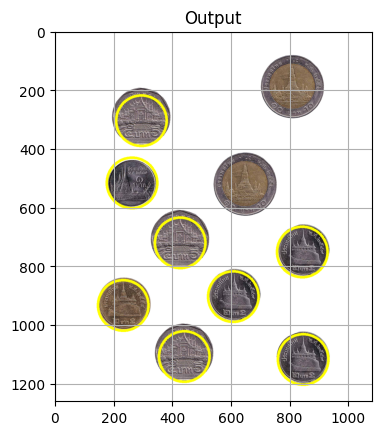

In [57]:
peaks_2 = find_peaks(H_2)
NMS(peaks_2, 86)
plot_circle(peaks_2, 86, 255, 255, 0, "Output", output)
count_2_bahts = peaks_2.shape[0] - np.sum(~peaks_2.any(1))
monetary_value = calc_monetary(monetary_value, count_2_bahts, "2")

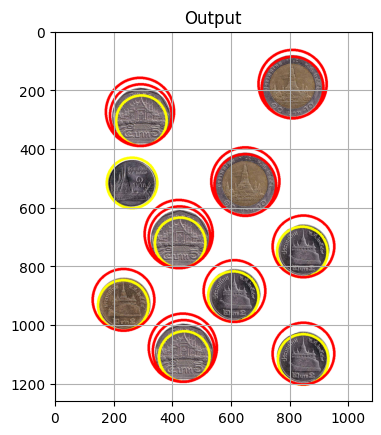

In [66]:
peaks_1 = find_peaks(H_1)
NMS(peaks_1, 65)
plot_circle(peaks_1, 65, 0, 0, 255, "Output", output)
count_1_bahts = peaks_1.shape[0] - np.sum(~peaks_1.any(1))
monetary_value = calc_monetary(monetary_value, count_1_bahts, "1")

In [67]:
print(f"{count_10_bahts} 10 bahts, {count_5_bahts} 5 bahts, {count_2_bahts} 2 bahts, and {count_1_bahts} 1 bahts were detected.")
print(f"Monetary value: {monetary_value}")

9 10 bahts, 0 5 bahts, 8 2 bahts, and 0 1 bahts were detected.
Monetary value: 156
